Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Load Data

In [2]:
naughts_wins = {}
naughts_losses = {}
naughts_draws = {}
naughts_avg_rewards = {}
naughts_q_value_changes = {}

for i in range(1,11):
    filepath = f"../ai/data/naughts/naughts_gen{i}"
    win_rates = []
    loss_rates = []
    draw_rates = []
    avg_rewards = []
    q_value_chgs = []

    with open(filepath, "r") as file:
        for line in file:
            win_rates.append(float(line.split(",")[0].split("Win Rate:")[1].strip()))
            loss_rates.append(float(line.split(",")[1].split("Loss Rate:")[1].strip()))
            draw_rates.append(float(line.split(",")[2].split("Draw Rate:")[1].strip()))
            avg_rewards.append(float(line.split(",")[3].split("Average Reward:")[1].strip()))
            q_value_chgs.append(float(line.split(",")[4].split("Average Q-Value Change:")[1].strip()))

    naughts_wins[f"training_run_{i}"] = win_rates
    naughts_losses[f"training_run_{i}"] = loss_rates
    naughts_draws[f"training_run_{i}"] = draw_rates
    naughts_avg_rewards[f"training_run_{i}"] = avg_rewards
    naughts_q_value_changes[f"training_run_{i}"] = q_value_chgs


naughts_wins_df = pd.DataFrame(naughts_wins)
naughts_losses_df = pd.DataFrame(naughts_losses)
naughts_draws_df = pd.DataFrame(naughts_draws)
naughts_avg_rewards_df = pd.DataFrame(naughts_avg_rewards)
naughts_q_value_chg_df = pd.DataFrame(naughts_q_value_changes)

Compute Training Run Win/Loss/Draw Rates

In [3]:
win_loss_draw_df = pd.DataFrame(columns=['Win Rate', 'Loss Rate', 'Draw Rate'])

for i in range(1, 11):
    run_win_rate = (naughts_wins_df[f"training_run_{i}"] * 1000).sum() / 100000
    run_loss_rate = (naughts_losses_df[f"training_run_{i}"] * 1000).sum() / 100000
    run_draw_rate = (naughts_draws_df[f"training_run_{i}"] * 1000).sum() / 100000
    
    win_loss_draw_df.loc[f"training_run{i}"] = [run_win_rate, run_loss_rate, run_draw_rate]

win_loss_draw_df

,Win Rate,Loss Rate,Draw Rate
training_run1,0.78645,0.11694,0.09661
training_run2,0.83515,0.04052,0.12433
training_run3,0.89603,0.03270,0.07127
training_run4,0.88428,0.03871,0.07701
training_run5,0.89057,0.03978,0.06965
training_run6,0.91662,0.04111,0.04227
training_run7,0.83708,0.08953,0.07339
training_run8,0.81250,0.09651,0.09099
training_run9,0.79002,0.10165,0.10833
training_run10,0.76644,0.05588,0.17768


Plot Training Run Win/Loss/Draw Rates

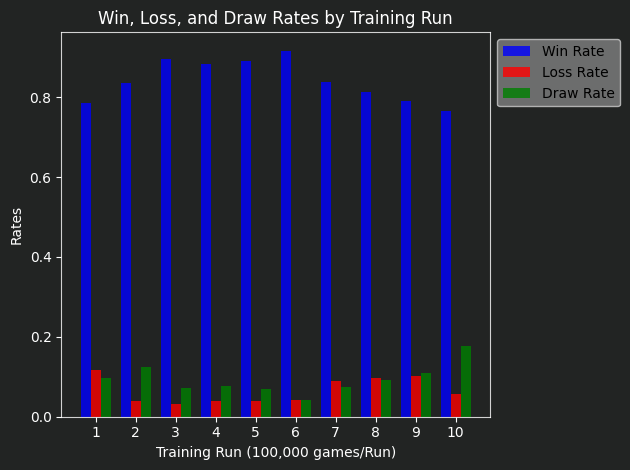

In [4]:
training_runs = [i for i in range(1,11)]
win_rates = win_loss_draw_df['Win Rate']
loss_rates = win_loss_draw_df['Loss Rate']
draw_rates = win_loss_draw_df['Draw Rate']

background_colour = "#222423"
legend_colour = "grey"
axis_colour = "white"

# Set up the figure and axis
fig, ax = plt.subplots(facecolor=background_colour)
index = range(len(training_runs))
bar_width = 0.25
opacity = 0.8

# Plotting the bars
rects1 = ax.bar(index, win_rates, bar_width, alpha=opacity, color='b', label='Win Rate')
rects2 = ax.bar([i + bar_width for i in index], loss_rates, bar_width, alpha=opacity, color='r', label='Loss Rate')
rects3 = ax.bar([i + 2 * bar_width for i in index], draw_rates, bar_width, alpha=opacity, color='g', label='Draw Rate')

# Adding labels and title
ax.set_facecolor(background_colour)
ax.set_xlabel('Training Run (100,000 games/Run)')
ax.set_ylabel('Rates')
ax.set_title('Win, Loss, and Draw Rates by Training Run')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(training_runs)
ax.legend(loc='best', bbox_to_anchor=(1, 1), facecolor=legend_colour)

ax.tick_params(axis='x', colors=axis_colour)  
ax.tick_params(axis='y', colors=axis_colour)
ax.spines['bottom'].set_color(axis_colour)
ax.spines['bottom'].set_alpha(opacity)
ax.spines['top'].set_color(axis_colour)
ax.spines['top'].set_alpha(opacity)
ax.spines['left'].set_color(axis_colour)
ax.spines['left'].set_alpha(opacity)
ax.spines['right'].set_color(axis_colour)
ax.spines['right'].set_alpha(opacity)

ax.xaxis.label.set_color(axis_colour)
ax.yaxis.label.set_color(axis_colour)
ax.title.set_color(axis_colour)

# Display the plot
plt.tight_layout()
plt.show()

Overall Win/Loss/Draw Rate

In [5]:
overall_win_rate = (win_loss_draw_df["Win Rate"] * 100000).sum() / 1000000
overall_loss_rate = (win_loss_draw_df[f"Loss Rate"] * 100000).sum() / 1000000
overall_draw_rate = (win_loss_draw_df[f"Draw Rate"] * 100000).sum() / 1000000

print("Overall Win Loss Draw rates (1,000,000 games)")
print(f"Win Rate: {overall_win_rate*100}%")
print(f"Loss Rate: {overall_loss_rate*100}%")
print(f"Draw Rate: {overall_draw_rate*100}%")

Overall Win Loss Draw rates (1,000,000 games)
Win Rate: 84.1514%
Loss Rate: 6.5333000000000006%
Draw Rate: 9.3153%


Win Loss Draw Rates Over Training Run

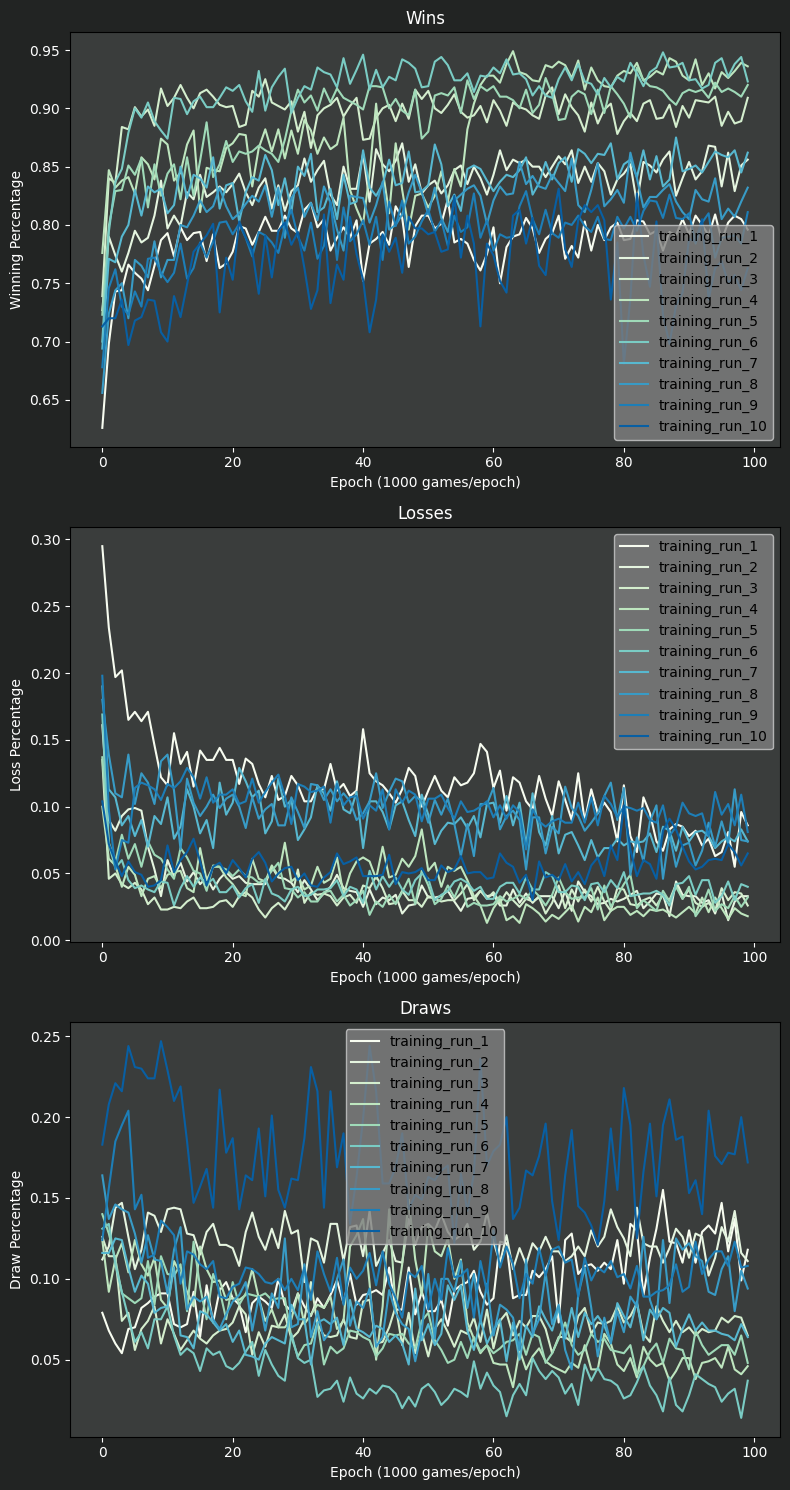

In [6]:
figure_background_colour = "#222423"
graph_background_colour = '#3a3d3c'
legend_colour = "grey"
axis_colour = "white"

fig, axs = plt.subplots(3, 1, figsize=(8, 15), facecolor=figure_background_colour)

cm = plt.get_cmap('GnBu') 
num_lines = len(naughts_wins_df.columns)

# Wins
for i, column in enumerate(naughts_wins_df.columns):
    color = cm(i / num_lines)
    axs[0].plot(naughts_wins_df[column], label=column, color=color)
axs[0].set_facecolor(graph_background_colour)
axs[0].set_title('Wins')
axs[0].set_xlabel('Epoch (1000 games/epoch)')
axs[0].set_ylabel('Winning Percentage')
axs[0].legend(facecolor=legend_colour)

# Losses
for i, column in enumerate(naughts_losses_df.columns):
    color = cm(i / num_lines)
    axs[1].plot(naughts_losses_df[column], label=column, color=color)
axs[1].set_facecolor(graph_background_colour)
axs[1].set_title('Losses')
axs[1].set_xlabel('Epoch (1000 games/epoch)')
axs[1].set_ylabel('Loss Percentage')
axs[1].legend(facecolor=legend_colour)


# Draws
for i, column in enumerate(naughts_draws_df.columns):
    color = cm(i / num_lines)
    axs[2].plot(naughts_draws_df[column], label=column, color=color)
axs[2].set_facecolor(graph_background_colour)
axs[2].set_title('Draws')
axs[2].set_xlabel('Epoch (1000 games/epoch)')
axs[2].set_ylabel('Draw Percentage')
axs[2].legend(facecolor=legend_colour)


# Adding legends and adjusting layout
for ax in axs:
    ax.tick_params(axis='x', colors=axis_colour)  
    ax.tick_params(axis='y', colors=axis_colour)
    ax.xaxis.label.set_color(axis_colour)
    ax.yaxis.label.set_color(axis_colour)
    ax.title.set_color(axis_colour)
    

plt.tight_layout()
plt.show()

Average Rewards and Q-Value Change Over Training Run

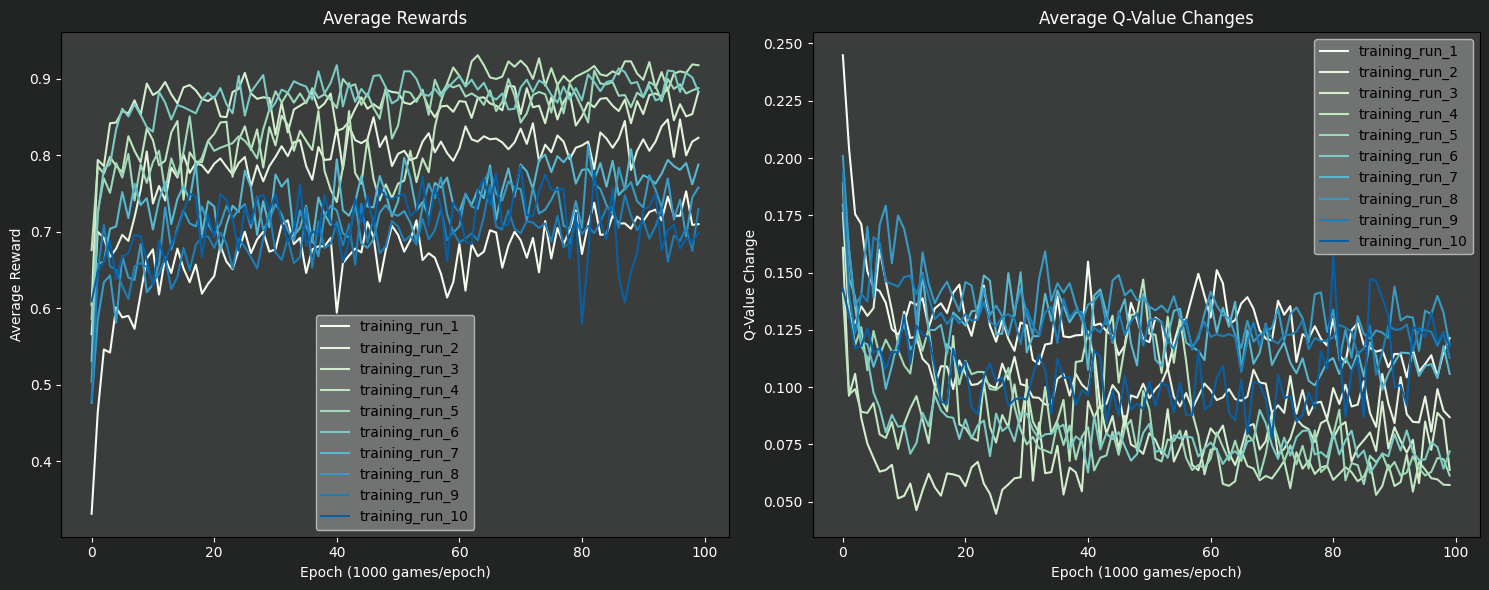

In [7]:
figure_background_colour = "#222423"
graph_background_colour = '#3a3d3c'
legend_colour = "grey"
axis_colour = "white"

fig, axs = plt.subplots(1, 2, figsize=(15, 6), facecolor= figure_background_colour)  

cm = plt.get_cmap('GnBu') 
num_lines = len(naughts_avg_rewards_df.columns)

# Average Rewards
for i, column in enumerate(naughts_avg_rewards_df.columns):
    color = cm(i / num_lines)
    axs[0].plot(naughts_avg_rewards_df[column], label=column, color=color)

axs[0].set_facecolor(graph_background_colour)
axs[0].set_title('Average Rewards')
axs[0].set_xlabel('Epoch (1000 games/epoch)')
axs[0].set_ylabel('Average Reward')
axs[0].legend(facecolor=legend_colour)

# Q-Value Changes
for i, column in enumerate(naughts_q_value_chg_df.columns):
    color = cm(i / num_lines)
    axs[1].plot(naughts_q_value_chg_df[column], label=column, color=color)

axs[1].set_facecolor(graph_background_colour)
axs[1].set_title('Average Q-Value Changes')
axs[1].set_xlabel('Epoch (1000 games/epoch)')
axs[1].set_ylabel('Q-Value Change')
axs[1].legend(facecolor=legend_colour)

# Adding legends and adjusting layout
for ax in axs:
    ax.tick_params(axis='x', colors=axis_colour)  
    ax.tick_params(axis='y', colors=axis_colour)
    ax.xaxis.label.set_color(axis_colour)
    ax.yaxis.label.set_color(axis_colour)
    ax.title.set_color(axis_colour)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()
